<div style="text-align: center;">
     <strong<p align="center">MODELO REGRESSIVO PARA DADOS DE CONTAGEM</po</strong>
</div>
<div style="text-align: center;">
     <strong<p align="center"> <span style="font-family:Comic Sans MS; color:red">MODELO POISSON X Modelo Binomial Negativo (POISSON GAMA)</span> </po</strong>
</div>

### Contextualiza√ß√£o:

Um estudo foi conduzido para investigar a influ√™ncia dos aspectos culturais na propens√£o √† corrup√ß√£o, focando no comportamento dos diplomatas em rela√ß√£o ao estacionamento nas proximidades da sede das Na√ß√µes Unidas, localizada em Manhattan, Nova York. At√© 2002, a imunidade diplom√°tica isentava os diplomatas da ONU de penalidades relacionadas a infra√ß√µes de estacionamento, limitando as consequ√™ncias de suas a√ß√µes √†s normas culturais vigentes. No entanto, a partir de 2002 (ap√≥s o 11/09/2001), as autoridades passaram a ter o direito de confiscar as placas diplom√°ticas dos infratores, alterando assim o regime de aplica√ß√£o das penas. Como resultado, as infra√ß√µes de estacionamento n√£o pagas diminu√≠ram drasticamente. Aqueles que costumavam estacionar de forma irregular passaram a evitar essa pr√°tica, enquanto aqueles que j√° respeitavam as regras de estacionamento continuaram a faz√™-lo.
- Rerefer√™ncia:
     - Fisman, R.; Miguel, E. Corruption, Norms, and Legal Enforcement: Evidence From  Diplomatic Parking Ticket
     - Journal of Political Economy, v. 15, n. 6, p. 1020-1048, 2007.
     - Dispon√≠vel em: https://www.journals.uchicago.edu/doi/abs/10.1086/527495


**Perguntas**:

1. Qual seria a quantidade m√©dia esperada de viola√ß√µes de tr√¢nsito para um pa√≠s cujo corpo diplom√°tico seja composto por X1 membros, considerando o per√≠odo anterior √† vig√™ncia da lei e cujo √≠ndice de corrup√ß√£o seja igual a X2?

2. Qual seria a quantidade m√©dia esperada de viola√ß√µes de tr√¢nsito para o mesmo pa√≠s, por√©m agora considerando a vig√™ncia da lei?

3. Aspectos culturais influenciam uma maior ou menor propens√£o √† corrup√ß√£o?

Para isso, ser√£o constru√≠dos **Modelos de Regress√£o para Dados de Contagem**: <span style="font-family:Comic Sans MS; color:red">**modelo preditivo Poisson**</span> e <span style="font-family:Comic Sans MS; color:red">**modelo preditivo Binomial Negativo**</span>.
- Por que utilizar **Modelos de Regress√£o para Dados de Contagem**?
  - O objetivo aqui √© analisar o comportamento de determinada <span style="font-family:Comic Sans MS; color:blue">**vari√°vel dependente**</span> (comumente chamada de Y), em fun√ß√£o de <span style="font-family:Comic Sans MS; color:red">**vari√°veis preditoras**</span> (comumente chamadas de X). A **vari√°vel dependente** esperada √© da forma <span style="font-family:Comic Sans MS; color:brown">**quantitativa**</span>, com <span style="font-family:Comic Sans MS; color:purple">**valores discretos**</span>, <span style="font-family:Comic Sans MS; color:lime">**n√£o negativos**</span>, <span style="font-family:Comic Sans MS; color:pink">**para uma determinada exposi√ß√£o**</span>.

In [1]:
# Descomente as linhas abaixo e execute para instalar os pacotes necess√°rios (Execute este comando apenas uma vez!)

#!pip install pandas
#!pip install numpy
#!pip install -U seaborn
#!pip install matplotlib
#!pip install plotly
#!pip install scipy
#!pip install statsmodels
#!pip install scikit-learn
#!pip install statstests

In [2]:
# Importa√ß√£o dos pacotes

import pandas as pd # manipula√ß√£o de dados em formato de dataframe
import numpy as np # opera√ß√µes matem√°ticas
import seaborn as sns # visualiza√ß√£o gr√°fica
import matplotlib.pyplot as plt # visualiza√ß√£o gr√°fica
from math import exp, factorial # fun√ß√µes matem√°ticas 'exp' e 'factorial'
import statsmodels.api as sm # estima√ß√£o de modelos
import statsmodels.formula.api as smf # estima√ß√£o de modelos de contagem
from statsmodels.discrete.count_model import ZeroInflatedNegativeBinomialP,ZeroInflatedPoisson
# pacote acima para a estima√ß√£o dos modelos ZINB e ZIP, respectivamente
from statsmodels.discrete.discrete_model import NegativeBinomial, Poisson
# pacote anterior para a realiza√ß√£o do teste de Vuong
from scipy import stats # estat√≠stica chi2
from statsmodels.iolib.summary2 import summary_col # compara√ß√£o entre modelos

import warnings
warnings.filterwarnings('ignore')

<div style="text-align: center;">
     <strong<p align="center">REGRESS√ÉO PARA DADOS DE CONTAGEM</po</strong>
</div>


In [3]:
# CARREGAMENTO DA BASE DE DADOS 'corruption'
df_corruption = pd.read_csv('corruption.csv', delimiter=',')

labels = '''
VARI√ÅVEIS:      
"violation" √© a vari√°vel Y (contagem): quantidade de viola√ß√µes de tr√¢nsito. √â uma vari√°vel quantitativa, discreta(inteiro), n√£o negativa(inclui o zero) e para dada exposi√ß√£o (por m√™s)                                             
"post": "no" antes do enforcement legal                                   
"post": "yes" ap√≥s o enforcement legal                                    
"staf": corpo diplom√°tico                                                 
"corruption": indicador de corrup√ß√£o. √çndice da transpar√™ncia Internacional. Quanto maior o √≠ndice, pior √© a classifica√ß√£o do pa√≠s.  
'''
print(labels)
print("\n\n", df_corruption)


VARI√ÅVEIS:      
"violation" √© a vari√°vel Y (contagem): quantidade de viola√ß√µes de tr√¢nsito. √â uma vari√°vel quantitativa, discreta(inteiro), n√£o negativa(inclui o zero) e para dada exposi√ß√£o (por m√™s)                                             
"post": "no" antes do enforcement legal                                   
"post": "yes" ap√≥s o enforcement legal                                    
"staf": corpo diplom√°tico                                                 
"corruption": indicador de corrup√ß√£o. √çndice da transpar√™ncia Internacional. Quanto maior o √≠ndice, pior √© a classifica√ß√£o do pa√≠s.  



                   country code  violations  staff post  corruption
0                  Angola  AGO          50      9   no    1.047506
1                  Angola  AGO           1      9  yes    1.047506
2                 Albania  ALB          17      3   no    0.921079
3                 Albania  ALB           0      3  yes    0.921079
4    United Arab Emirates  ARE  

In [4]:
# Caracter√≠sticas das vari√°veis do dataset
df_corruption.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 298 entries, 0 to 297
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     298 non-null    object 
 1   code        298 non-null    object 
 2   violations  298 non-null    int64  
 3   staff       298 non-null    int64  
 4   post        298 non-null    object 
 5   corruption  298 non-null    float64
dtypes: float64(1), int64(2), object(3)
memory usage: 14.1+ KB


In [5]:
# Estat√≠sticas univariadas
df_corruption.describe()

violations       staff  corruption
count  298.000000  298.000000  298.000000
mean     6.496644   11.805369    0.013641
std     18.210377   11.079558    1.012474
min      0.000000    2.000000   -2.582988
25%      0.000000    6.000000   -0.415147
50%      0.000000    9.000000    0.326959
75%      3.000000   14.000000    0.720250
max    167.000000   86.000000    1.582807

In [6]:
# Tabela de frequ√™ncias da vari√°vel dependente 'violations'
# Fun√ß√£o 'values_counts' do pacote 'pandas', sem e com o argumento 'normalize=True', para gerar as contagens e os percentuais, respectivamente

contagem = df_corruption['violations'].value_counts(dropna=False)
percent = (df_corruption['violations'].value_counts(dropna=False, normalize=True)*100).round(2)
table = pd.concat([contagem, percent], axis=1, keys=['contagem', '%'], sort=True)
table

contagem      %
violations                 
0                156  52.35
1                 35  11.74
2                 16   5.37
3                 17   5.70
4                  5   1.68
5                 10   3.36
6                  3   1.01
7                  4   1.34
8                  3   1.01
9                  3   1.01
10                 3   1.01
12                 5   1.68
13                 4   1.34
14                 1   0.34
15                 1   0.34
16                 3   1.01
17                 2   0.67
18                 2   0.67
21                 2   0.67
22                 1   0.34
24                 1   0.34
27                 2   0.67
37                 2   0.67
40                 1   0.34
43                 2   0.67
44                 2   0.67
45                 1   0.34
48                 1   0.34
50                 1   0.34
56                 1   0.34
59                 1   0.34
61                 2   0.67
67                 1   0.34
69                 1   0.34
99                 1   0.34
150                1   0.34
167                1   0.34

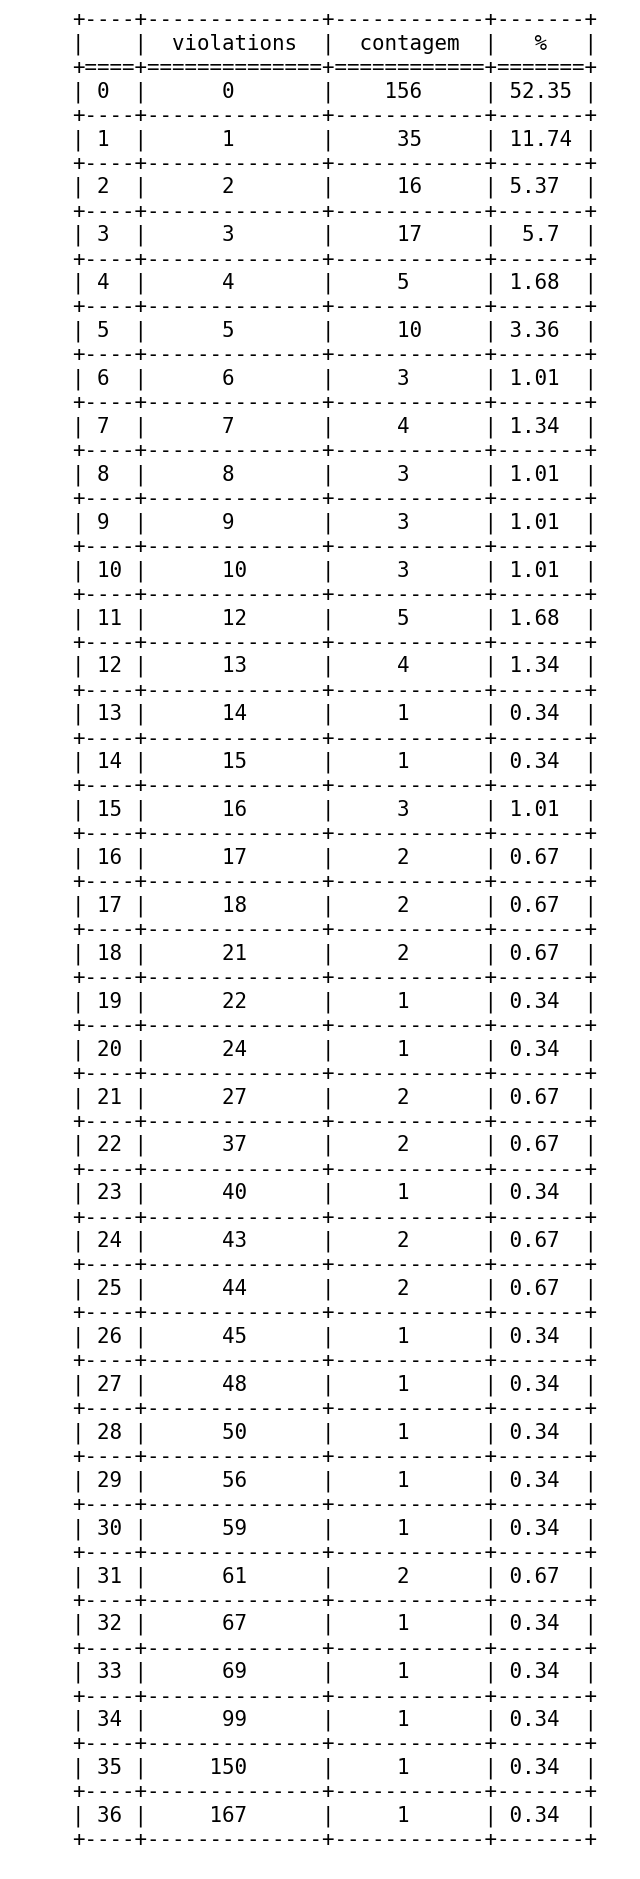

In [7]:
# Visualiza√ß√£o da tabela de frequ√™ncias da vari√°vel dependente 'violations' no ambiente Plots

table.reset_index(level=0, inplace=True)
table.rename(columns={'index': 'n'}, inplace=True)

from tabulate import tabulate
tabela = tabulate(table, headers='keys', tablefmt='grid', numalign='center')

plt.figure(figsize=(8, 3))
plt.text(0.1, 0.1, tabela, {'family': 'monospace', 'size': 15})
plt.axis('off')
plt.show()

<div style="text-align: center;">
     <strong<p align="center">DIAGN√ìSTICO</po</strong>
</div>

A primeira avalia√ß√£o (diagn√≥stico) a ser realizada ao estimar o modelo consiste em 
<span style="font-family:Comic Sans MS; color:red">**verificar a presen√ßa de superdispers√£o nos dados**</span> <span style="font-family:Comic Sans MS; color:blue">**(cauda longa e consecutivamente aumento da vari√¢ncia)**</span>
condicionada pelo comportamento de varia√ß√£o das vari√°veis preditoras sobre o comportamento da vari√°vel output.

<span style="font-family:Comic Sans MS; color:red">**Observa√ß√£o:**</span> Caso seja detectada superdispers√£o, o modelo de Poisson n√£o √© o mais adequado. Nesse cen√°rio, o modelo ideal seria o Modelo de Binomial Negativo (ou Poisson Gama), uma vez que identificamos que a vari√¢ncia √© estatisticamente superior √† m√©dia.

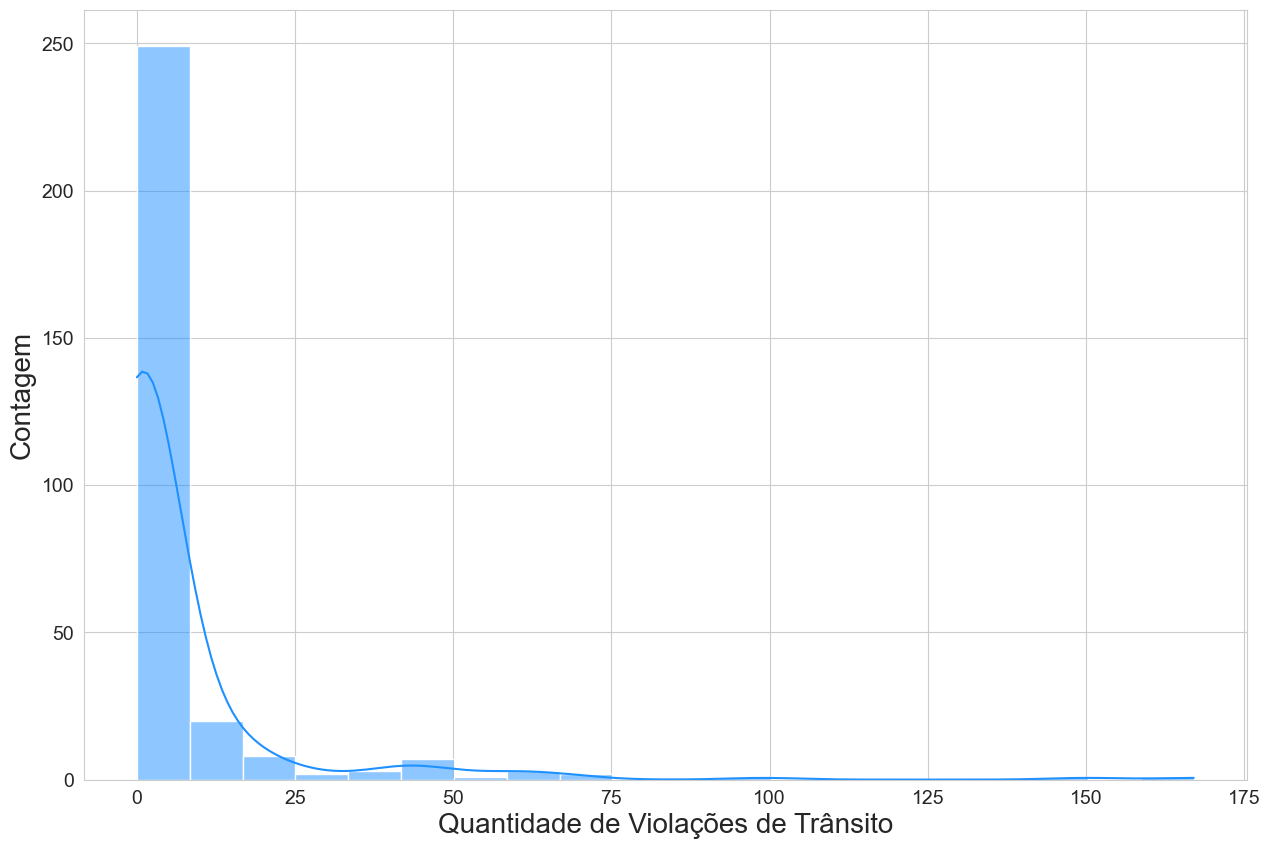

In [8]:
# Histograma da vari√°vel dependente 'violations'

with sns.axes_style("whitegrid"):
    plt.figure(figsize=(15,10))
    sns.histplot(data=df_corruption, x='violations', bins=20,
                 color='dodgerblue', edgecolor='white', kde=True) # To see kernel, use kde=True
    plt.xlabel('Quantidade de Viola√ß√µes de Tr√¢nsito', fontsize=20)
    plt.ylabel('Contagem', fontsize=20)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.show()

Analisando o gr√°fico anterior, identifica-se a presen√ßa de cauda longa, indicando superdispers√£o. No entanto, vamos examinar os resultados num√©ricos para confirmar o diagn√≥stico

In [9]:
# Diagn√≥stico preliminar, em termos num√©rico, para observa√ß√£o de eventual igualdade entre a m√©dia e a vari√¢ncia da vari√°vel dependente 'violations'

pd.DataFrame({'M√©dia':[df_corruption.violations.mean()],
              'Vari√¢ncia':[df_corruption.violations.var()]})

M√©dia   Vari√¢ncia
0  6.496644  331.617834

Os resultados num√©ricos mostram que a vari√¢ncia √© muito superior √† m√©dia, confirmando a superdispers√£o nos dados. Vamos estender o diagn√≥stico, atribuindo um intervalo √†quilo que √© considerado estatisticamente igual e √†quilo que √© considerado muito superior.

In [12]:
import pandas as pd

# C√°lculo da m√©dia e vari√¢ncia
media = df_corruption.violations.mean()
variancia = df_corruption.violations.var()

# Definindo um intervalo de toler√¢ncia de ¬±5%
tolerancia = 0.05 * media
intervalo_min = media - tolerancia
intervalo_max = media + tolerancia

# Verifica√ß√£o e impress√£o da mensagem apropriada
if intervalo_min <= variancia <= intervalo_max:
    print(f"A vari√¢ncia ({variancia:.2f}) √© estatisticamente igual √† m√©dia ({media:.2f}). Portanto, o melhor modelo de estima√ß√£o √© Poisson.\n")
else:
    print(f"A vari√¢ncia ({variancia:.2f}) √© muito superior √† m√©dia ({media:.2f}). Portanto, o melhor modelo de estima√ß√£o √© Poisson Negativo.\n")

A vari√¢ncia (331.62) √© muito superior √† m√©dia (6.50). Portanto, o melhor modelo de estima√ß√£o √© Poisson Negativo.



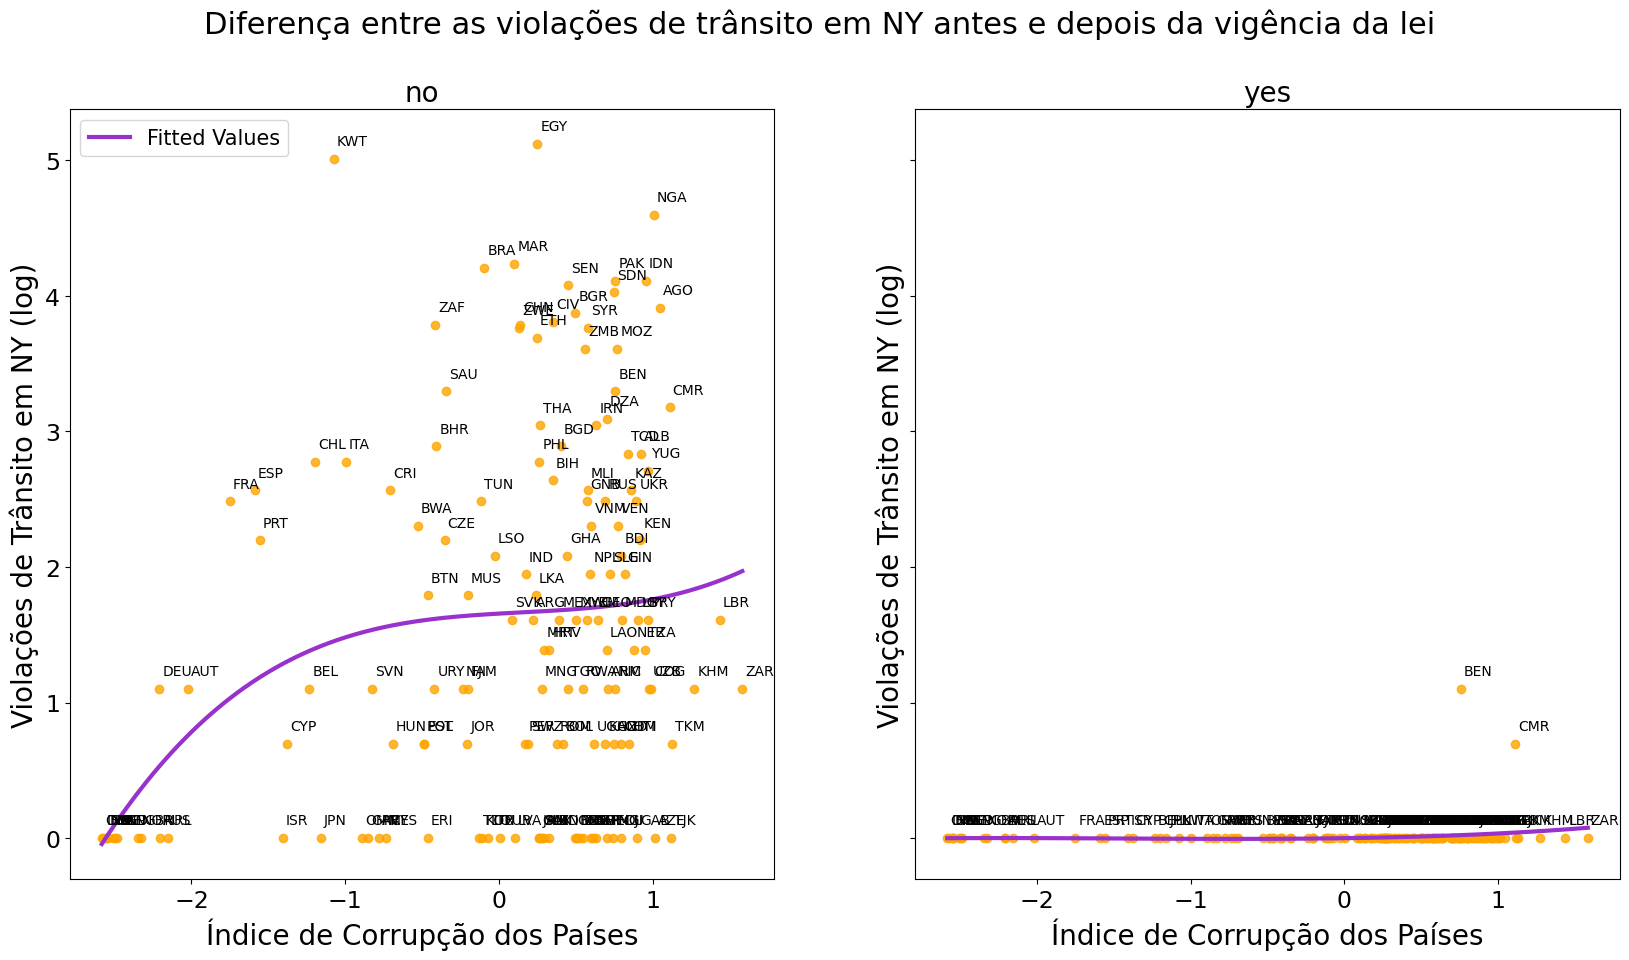

In [14]:
# Comportamento das vari√°veis 'corruption' e 'violations' antes e depois do in√≠cio da vig√™ncia da lei

fig, axs = plt.subplots(ncols=2, figsize=(20,10), sharey=True)

fig.suptitle('Diferen√ßa entre as viola√ß√µes de tr√¢nsito em NY antes e depois da vig√™ncia da lei',
             fontsize=22)

post = ['no', 'yes']

def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x']+.02, point['y']+.1, str(point['val']))

for i, v in enumerate(post):
    df = df_corruption[df_corruption.post==v]
    df['violations'] = np.log(df.violations)
    df.loc[df['violations'] == np.inf, 'violations'] = 0
    df.loc[df['violations'] == -np.inf, 'violations'] = 0
    sns.regplot(data=df, x='corruption', y='violations',
                order=3, ax=axs[i], ci=False,
                line_kws={'color':'darkorchid', 'linewidth': 3,
                          'label':'Fitted Values'},
                scatter_kws={'color':'orange'})
    axs[i].set_title(v, fontsize=20)
    axs[i].set_ylabel("Viola√ß√µes de Tr√¢nsito em NY (log)", fontsize=20)
    axs[i].set_xlabel("√çndice de Corrup√ß√£o dos Pa√≠ses", fontsize=20)
    label_point(df.corruption, df.violations, df.code, axs[i])

for ax in axs:
    ax.tick_params(axis='both', which='major', labelsize=17)
    
axs[0].legend(loc='upper left', fontsize=15)

plt.show()


**Gr√°fico da esquerda**: Viola√ß√µes cometidas antes da vig√™ncia da lei que multa viola√ß√µes de tr√¢nsito.

**Gr√°fico da direita**: Viola√ß√µes cometidas ap√≥s a implementa√ß√£o da lei que multa viola√ß√µes de tr√¢nsito.

**Obs**.: Observa-se que, ap√≥s a lei que multa viola√ß√µes de tr√¢nsito entrar em vigor, o n√∫mero de viola√ß√µes caiu drasticamente.

## <span style="font-family:Comic Sans MS; color:red">**Estima√ß√£o de modelos**</span>

#### 1 - <span style="font-family:Comic Sans MS; color:yellow">**Estima√ß√£o do modelo Poisson**</span>

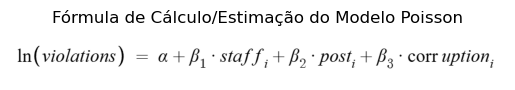

In [15]:
import matplotlib.image as mpimg

# Carregando a imagem (f√≥rmula)
img = mpimg.imread('PoisonFormula.png')

# Mostrando a f√≥rmula (imagem)
plt.imshow(img)
plt.axis('off')

# Adicionando label
plt.title('F√≥rmula de C√°lculo/Estima√ß√£o do Modelo Poisson')

plt.show()

In [16]:
# Estima√ß√£o do modelo Poisson

# O argumento 'family=sm.families.Poisson()' da fun√ß√£o 'smf.glm' define a estima√ß√£o de um modelo Poisson

# Como a vari√°vel "post" √© uma vari√°vel dicot√¥mica (yes, no), ent√£o o pr√≥prio modelo j√° vai fazer a dummiza√ß√£o. 
# Se a vari√°vel "post" n√£o fosse uma vari√°vel dicot√¥mica, precisariamos fazer a dummiza√ß√£o primeiro.
# Nosso modelodelo aqui √© "violations" em fun√ß√£o de "staff", "post" e "curruption".
modelo_poisson = smf.glm(formula='violations ~ staff + post + corruption',
                         data=df_corruption,
                         family=sm.families.Poisson()).fit()

# Par√¢metros do 'modelo_poisson'
modelo_poisson.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:             violations   No. Observations:                  298
Model:                            GLM   Df Residuals:                      294
Model Family:                 Poisson   Df Model:                            3
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2071.8
Date:                Sat, 22 Feb 2025   Deviance:                       3644.0
Time:                        02:24:47   Pearson chi2:                 6.77e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.9999
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       2.2127      0.031     71.134      0.000       2.152       2.274
post[T.yes]    -4.2968      0.197    -21.762      0.000      -4.684      -3.910
staff           0.0219      0.001     17.807      0.000       0.019       0.024
corruption      0.3418      0.027     12.430      0.000       0.288       0.396
===============================================================================
"""

Do resultado acima, temos:
- Intercept (Œ±):	2.2127
- post[T.yes]:	-4.2968
- staff:	0.0219
- corruption:	0.3418

In [17]:
# Uma outra forma mais completo de apresentar os outputs do modelo, pela fun√ß√£o 'summary_col'

summary_col([modelo_poisson],
            model_names=["MODELO"],
            stars=True,
            info_dict = {
                'N':lambda x: "{0:d}".format(int(x.nobs)),
                'Log-lik':lambda x: "{:.2f}".format(x.llf)
        })

<class 'statsmodels.iolib.summary2.Summary'>
"""

======================
              MODELO  
----------------------
Intercept   2.2127*** 
            (0.0311)  
post[T.yes] -4.2968***
            (0.1974)  
staff       0.0219*** 
            (0.0012)  
corruption  0.3418*** 
            (0.0275)  
N           298       
Log-lik     -2071.79  
======================
Standard errors in
parentheses.
* p<.1, ** p<.05,
***p<.01
"""

##### Pergunta: Todas as vari√°veis preditoras se mostraram estatisticamente diferentes de zero, considerando-se um n√≠vel de signific√¢ncia de 5%, ceteris paribus. Por√©m, j√° se pode afirmar que a estima√ß√£o Poisson √© a mais adequada?
Bom, para responder essa pergunta ser√° feito TESTE DE SUPERDISPERS√ÉO DE CAMERON E TRIVEDI (1990) para verificar SUPERDISPERS√ÉO nos modelos POISSON.

Se o p_value de Beta for menor ou igual a 0,05 (ou seja, se Beta for estatisticamente significante), ent√£o h√° SUPERDISPERS√ÉO. Portanto, o melhor modelo √© a Binomial Negativa.

Se o p_value for maior que 0,05 (ou seja, se n√£o houver signific√¢ncia estat√≠stica), ent√£o estamos em um cen√°rio de EQUIDISPERS√ÉO. Neste caso, √© usado o modelo de Poisson.

### Passos para realiza√ß√£o do teste:
###### 1¬∫ Passo: Estimar um modelo Poisson.
###### 2¬∫ Passo: Criar uma nova vari√°vel ùëå^‚àó utilizando os fitted values do modelo Poisson estimado anteriormente.
###### 3¬∫ Passo: Estimar um modelo auxiliar OLS, com a vari√°vel ùëå^‚àó  como vari√°vel dependente, os fitted values do modelo Poisson como √∫nica vari√°vel preditora e sem o intercepto.
###### 4¬∫ Passo: Observar a signific√¢ncia do par√¢metro Beta.

In [18]:
# Adicionando os fitted values do modelo Poisson ('lambda_poisson') ao dataframe
df_corruption['lambda_poisson'] = modelo_poisson.fittedvalues
df_corruption

country code  violations  staff post  corruption  \
0                  Angola  AGO          50      9   no    1.047506   
1                  Angola  AGO           1      9  yes    1.047506   
2                 Albania  ALB          17      3   no    0.921079   
3                 Albania  ALB           0      3  yes    0.921079   
4    United Arab Emirates  ARE           0      3   no   -0.779468   
..                    ...  ...         ...    ...  ...         ...   
293                 Zaire  ZAR           0      6  yes    1.582807   
294                Zambia  ZMB          37      9   no    0.562193   
295                Zambia  ZMB           0      9  yes    0.562193   
296              Zimbabwe  ZWE          43     14   no    0.133379   
297              Zimbabwe  ZWE           1     14  yes    0.133379   

     lambda_poisson  
0         15.919915  
1          0.216711  
2         13.371720  
3          0.182023  
4          7.477915  
..              ...  
293        0.243691  
294       13.486751  
295        0.183589  
296       12.994217  
297        0.176885  

[298 rows x 7 columns]

In [19]:
# Criando a nova vari√°vel Y* ('ystar')
df_corruption['ystar'] = (((df_corruption['violations']
                            -df_corruption['lambda_poisson'])**2)
                          -df_corruption['violations'])/df_corruption['lambda_poisson']
df_corruption

country code  violations  staff post  corruption  \
0                  Angola  AGO          50      9   no    1.047506   
1                  Angola  AGO           1      9  yes    1.047506   
2                 Albania  ALB          17      3   no    0.921079   
3                 Albania  ALB           0      3  yes    0.921079   
4    United Arab Emirates  ARE           0      3   no   -0.779468   
..                    ...  ...         ...    ...  ...         ...   
293                 Zaire  ZAR           0      6  yes    1.582807   
294                Zambia  ZMB          37      9   no    0.562193   
295                Zambia  ZMB           0      9  yes    0.562193   
296              Zimbabwe  ZWE          43     14   no    0.133379   
297              Zimbabwe  ZWE           1     14  yes    0.133379   

     lambda_poisson      ystar  
0         15.919915  69.815208  
1          0.216711  -1.783289  
2         13.371720  -0.286843  
3          0.182023   0.182023  
4          7.477915   7.477915  
..              ...        ...  
293        0.243691   0.243691  
294       13.486751  38.250347  
295        0.183589   0.183589  
296       12.994217  65.979120  
297        0.176885  -1.823115  

[298 rows x 8 columns]

In [21]:
# Estimando o modelo auxiliar OLS, sem o intercepto
modelo_auxiliar = sm.OLS.from_formula('ystar ~ 0 + lambda_poisson',
                                      df_corruption).fit()